In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report as rep,confusion_matrix as cm

data=pd.read_csv("/content/Kidney Patients Dataset.csv")

In [0]:
data.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [0]:
data.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

In [0]:
data.corr()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
Bp,1.000000,-0.164057,0.146060,0.190277,-0.151478,0.184173,0.144469,-0.103383,0.066791,-0.279441,0.025963,-0.220827,0.268003,0.290145
Sg,-0.164057,1.000000,-0.460835,-0.292053,0.253894,-0.249263,-0.176141,0.217456,-0.063450,0.492103,-0.206880,0.443437,-0.318956,-0.659504
Al,0.146060,-0.460835,1.000000,0.262564,-0.374484,0.405035,0.229396,-0.270709,0.114484,-0.548681,0.200664,-0.454131,0.478309,0.598389
Su,0.190277,-0.292053,0.262564,1.000000,-0.092940,0.126074,0.094568,-0.053448,0.180098,-0.156875,0.159033,-0.163825,0.253179,0.294555
Rbc,-0.151478,0.253894,-0.374484,-0.092940,1.000000,-0.236270,-0.138391,0.140568,0.018164,0.280991,-0.002205,0.202298,-0.139342,-0.282642
Bu,0.184173,-0.249263,0.405035,0.126074,-0.236270,1.000000,0.581176,-0.307357,0.336954,-0.540699,0.041530,-0.465947,0.387503,0.371982
Sc,0.144469,-0.176141,0.229396,0.094568,-0.138391,0.581176,1.000000,-0.624493,0.205361,-0.342053,-0.005420,-0.323056,0.273904,0.294076
Sod,-0.103383,0.217456,-0.270709,-0.053448,0.140568,-0.307357,-0.624493,1.000000,0.067414,0.333604,0.006334,0.316883,-0.306501,-0.342268
Pot,0.066791,-0.063450,0.114484,0.180098,0.018164,0.336954,0.205361,0.067414,1.000000,-0.100612,-0.074057,-0.120418,0.057028,0.077063
Hemo,-0.279441,0.492103,-0.548681,-0.156875,0.280991,-0.540699,-0.342053,0.333604,-0.100612,1.000000,-0.153806,0.681864,-0.576932,-0.729537


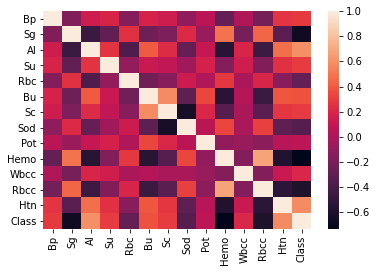

In [0]:
sns.heatmap(data.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


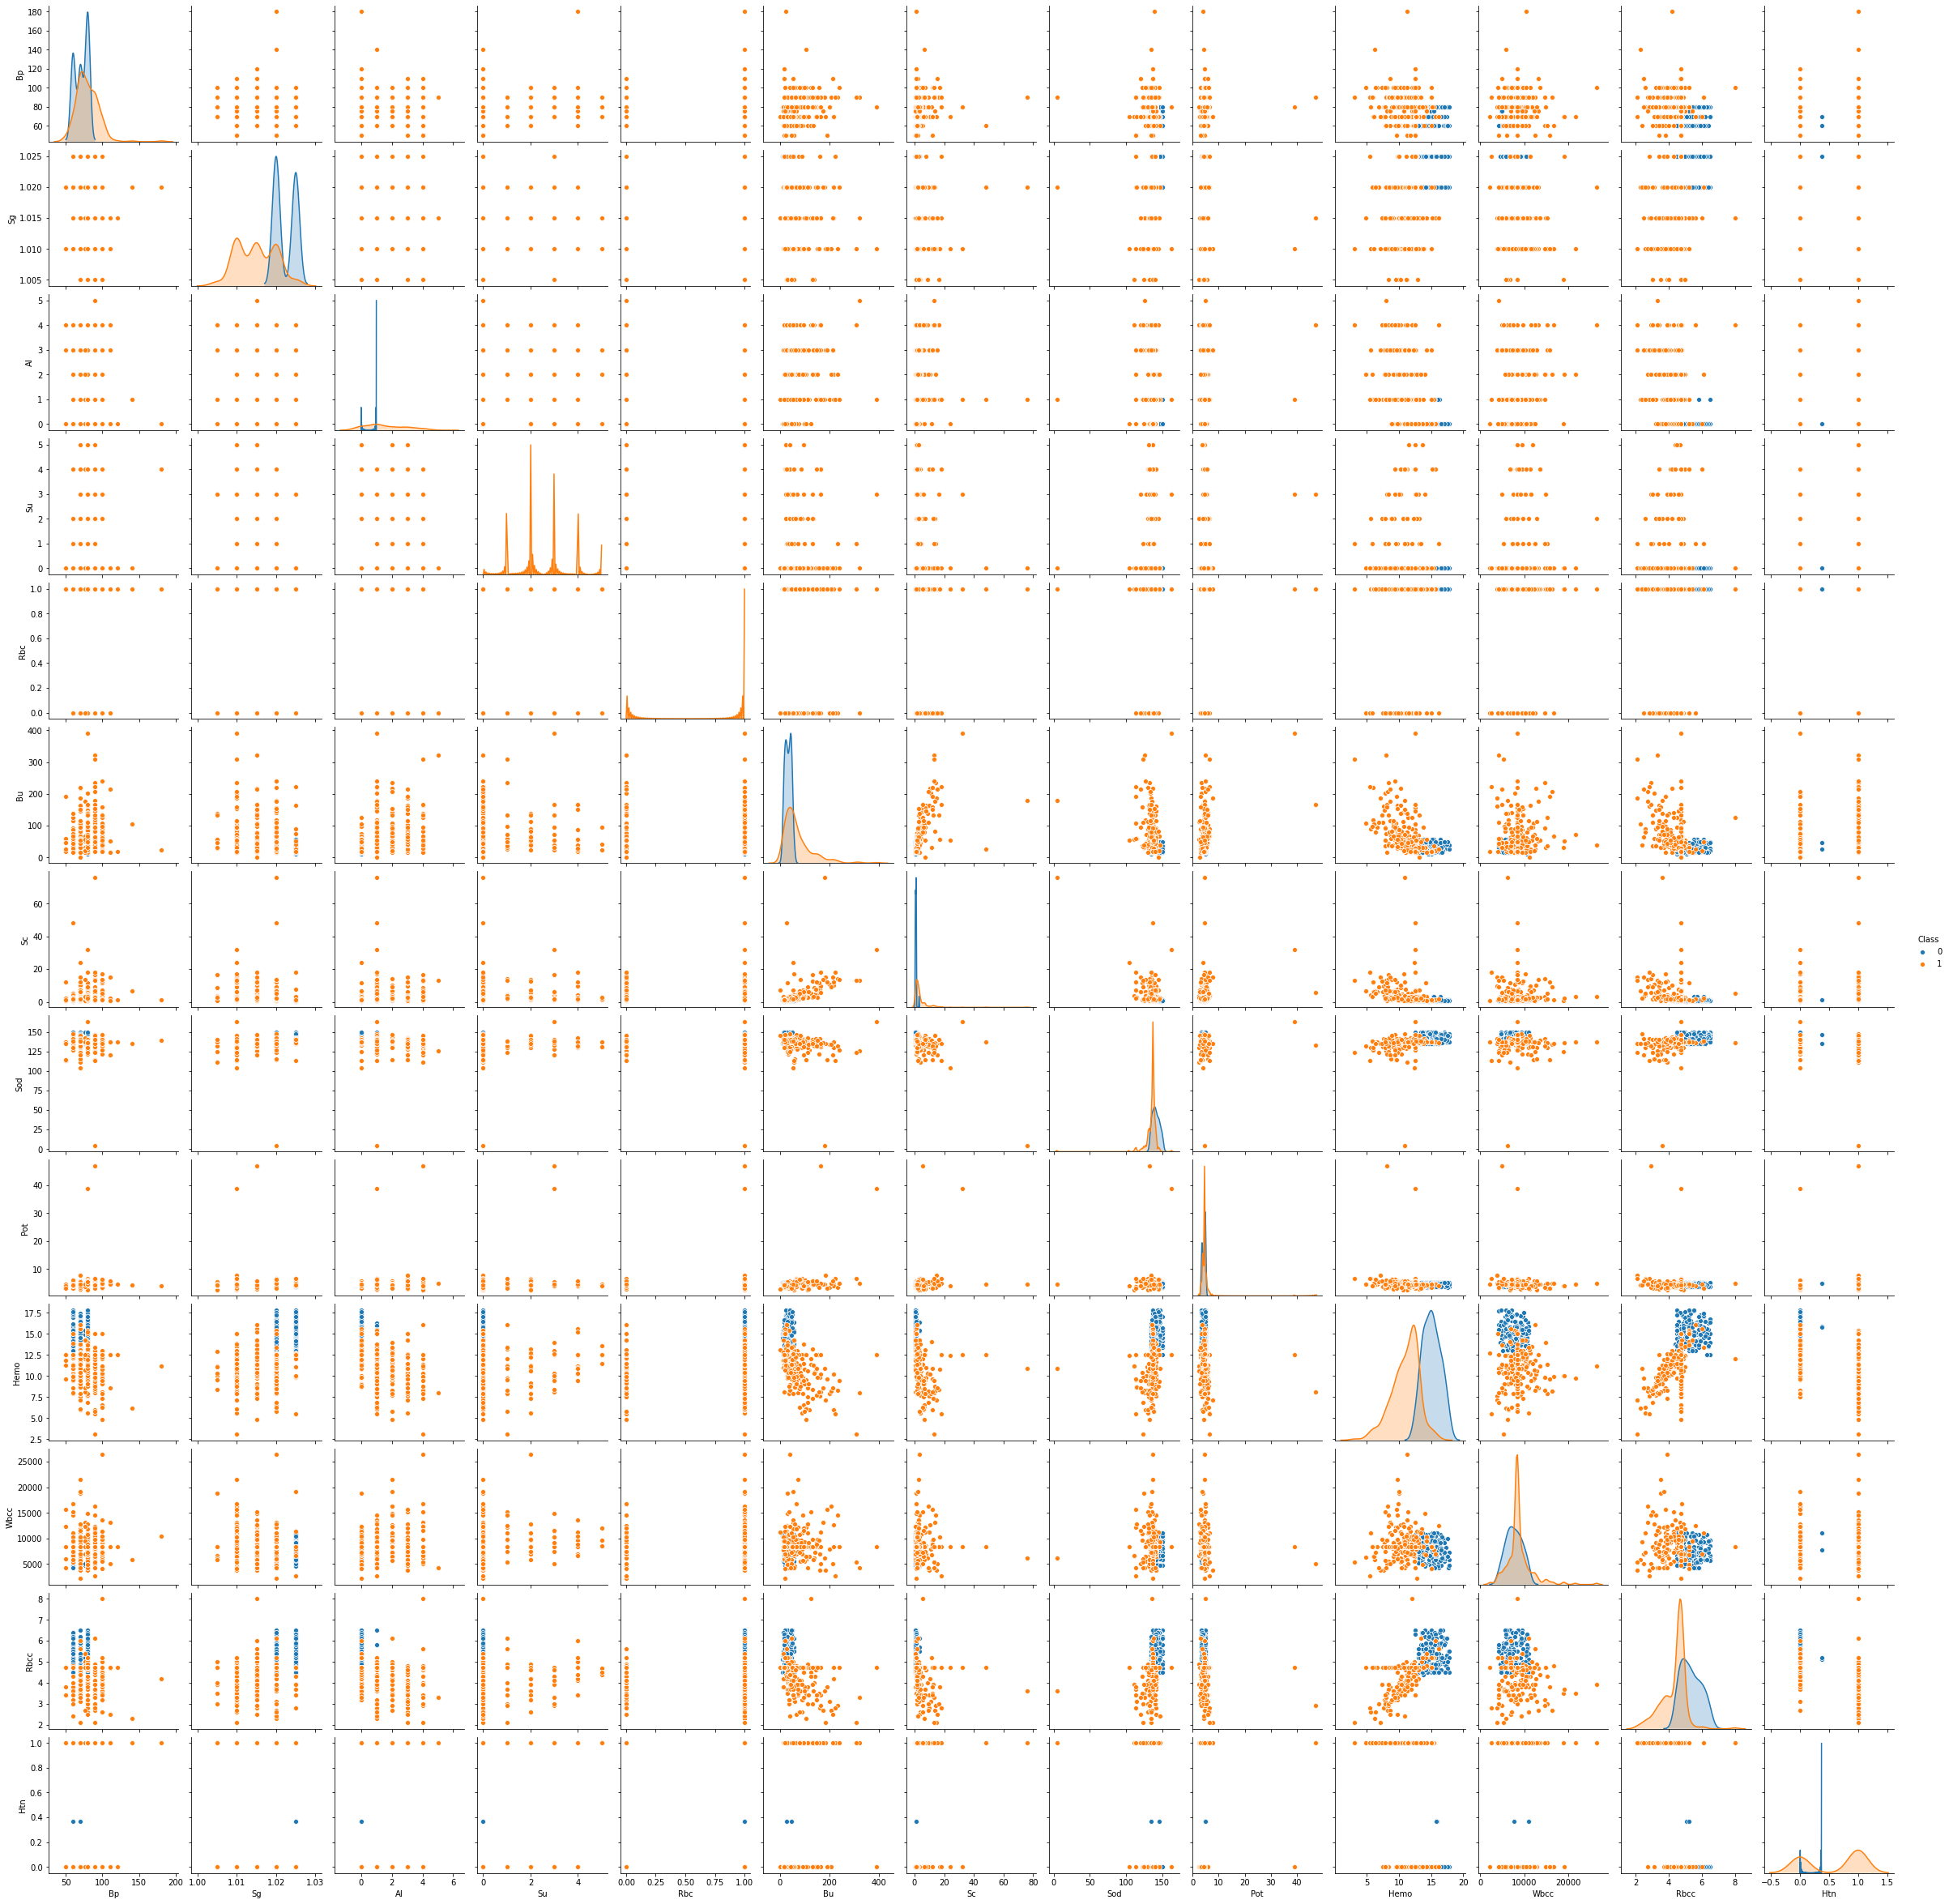

In [0]:
sns.pairplot(data,hue="Class",vars=['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn'])

In [0]:
#Select independent and dependent variables
y= data['Class']
x=data.drop(columns=['Class'])

In [0]:
# perform normalisation in indeoendent variables
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
Xnorm=scale.fit_transform(x)
print(" normalised data using standarisation ", Xnorm)

 normalised data using standarisation  [[ 2.63379226e-01  4.21485600e-01 -1.18041644e-02 ... -2.40505799e-01
   5.85900177e-01  1.30997921e+00]
 [-1.96549998e+00  4.21485600e-01  2.34902872e+00 ... -9.54773379e-01
   2.05537202e-03 -7.67209735e-01]
 [ 2.63379226e-01 -1.42107440e+00  7.75140131e-01 ... -3.59550396e-01
   2.05537202e-03 -7.67209735e-01]
 ...
 [ 2.63379226e-01  4.21485600e-01 -7.98748460e-01 ... -7.16684186e-01
   8.24204178e-01 -7.67209735e-01]
 [-1.22254025e+00  1.34276560e+00 -7.98748460e-01 ... -4.78594992e-01
   1.41996418e+00 -7.67209735e-01]
 [ 2.63379226e-01  1.34276560e+00 -7.98748460e-01 ... -6.37321121e-01
   1.65826818e+00 -7.67209735e-01]]


In [0]:
#Splitting the variables into into test and training sets
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(Xnorm,y,test_size = 0.1,random_state=0)

In [0]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

classifier_lr = LinearRegression()
classifier_lr.fit(x_train,y_train)
y_lr_pred = classifier_lr.predict(x_test)

#Result

classifier_lr.score(x_test,y_test)*100

73.09475512912472

In [0]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression() 
log_model.fit(x_train, y_train) 
y_pred_log = log_model.predict(x_test) 
   
  
log_model.score(x_test, y_pred_log)*100 

100.0

In [0]:
# XG Boost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
y_pred_xg = xgboost_model.predict(x_test)

xgboost_model.score(x_test , y_pred_xg)*100

100.0

In [0]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

gb_model.score(x_test , y_pred_gb)*100

100.0

In [0]:
#Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(x_train, y_train)
y_naive_pred = classifier_naive.predict(x_test)

#Accuracy

classifier_naive.score(x_test,y_test)*100

92.5

In [0]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier_rfc = RandomForestClassifier(n_estimators=20, random_state=0)
classifier_rfc.fit(x_train, y_train)
y_rfc_pred = classifier_rfc.predict(x_test)

#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_rfc_pred)*100

100.0

In [0]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)
y_dtc_pred = classifier_dtc.predict(x_test)

#accuracy
accuracy_score(y_test,y_dtc_pred)*100

100.0

In [0]:
#Simple Support Vector Classification

from sklearn.svm import SVC

classifier_svm = SVC()
classifier_svm.fit(x_train, y_train)
y_svm_pred = classifier_svm.predict(x_test)

#Accuracy
classifier_svm.score(x_test,y_test) *100

97.5

In [0]:
#Kernel Support Vector Classification

from sklearn.svm import SVC

classifier_svc = SVC(kernel='linear',random_state=0)
classifier_svc.fit(x_train,y_train)
y_svc_pred = classifier_svc.predict(x_test)

#accuracy
classifier_svc.score(x_test,y_test)*100

97.5

In [0]:
#Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier

classifier_sgd= SGDClassifier(loss='modified_huber',shuffle=True,random_state=0)
classifier_sgd.fit(x_train,y_train)
y_sgd_pred = classifier_sgd.predict(x_test)

#accuracy
accuracy_score(y_test,y_sgd_pred)*100

97.5

In [0]:
#Results of the classifications

con_log = cm(y_test,y_pred_log)
con_xg = cm(y_test,y_pred_xg)
con_gb = cm(y_test,y_pred_gb)
con_naive = cm(y_test,y_naive_pred)
con_rfc = cm(y_test,y_rfc_pred)
con_dtc = cm(y_test,y_dtc_pred)
con_svm = cm(y_test,y_svm_pred)
con_svc = cm(y_test,y_svc_pred)
con_sgd = cm(y_test,y_sgd_pred)


print("LOGISTIC REGRESSION MODEL\n",rep(y_test,y_pred_log),"\n", con_log ,"\n")
print("XG BOOST\n",rep(y_test,y_pred_xg),"\n", con_xg ,"\n")
print("GRADIENT BOOSTING CLASSIFIER\n",rep(y_test,y_pred_gb),"\n", con_gb ,"\n")
print("NAIVE BAYES RESULTS\n",rep(y_test,y_naive_pred),"\n", con_naive ,"\n")
print("RANDOM FOREST CLASSIFIER RESULTS\n",rep(y_test,y_rfc_pred),"\n" , con_rfc, "\n")
print("DECISION TREE RESULTS\n",rep(y_test,y_dtc_pred),"\n" , con_dtc , "\n")
print("SIMPLE SUPPORT VECTOR CLASSIFICATION\n",rep(y_test,y_svm_pred),"\n", con_svm , "\n")
print("KERNEL SUPPORT VECTOR CLASSIFICATION\n",rep(y_test,y_svc_pred),"\n", con_svc , "\n")
print("STOCHASTIC GRADIENT DESCENT RESULTS\n",rep(y_test,y_sgd_pred),"\n", con_sgd , "\n")

LOGISTIC REGRESSION MODEL
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        28

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40
 
 [[12  0]
 [ 0 28]] 

XG BOOST
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        28

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40
 
 [[12  0]
 [ 0 28]] 

GRADIENT BOOSTING CLASSIFIER
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        28

    accuracy                           1.00        40
   macro avg   

In [0]:
predicted_class= classifier_svc.predict(x)
data['Predicted Class']= predicted_class
data[['Class','Predicted Class']]

,Class,Predicted Class
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
395,0,1
396,0,1
397,0,1
398,0,1


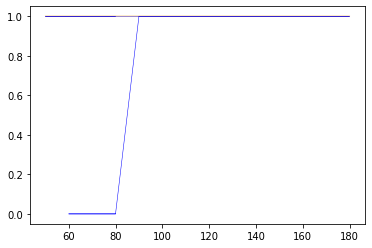

In [0]:
plt.plot(data['Bp'], data['Class'], color="blue" , linewidth="0.5")
plt.plot(data['Bp'], data['Predicted Class'] , color="orange" , linewidth="0.2")

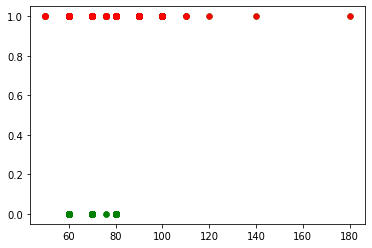

In [0]:
plt.scatter(data['Bp'], data['Class'], color="green" , linewidth="0.3")
plt.scatter(data['Bp'], data['Predicted Class'] , color="red" , linewidth="0.2")